In [1]:
import pandas as pd
import nltk
from nltk.tokenize import wordpunct_tokenize
from string import punctuation
from nltk.corpus import stopwords
import re
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter
import seaborn as sns
from textblob import TextBlob

%matplotlib inline

# Visuals for final paper (not in OOP)

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import wordpunct_tokenize
from string import punctuation
from nltk.corpus import stopwords
import re
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.dates import DateFormatter
import seaborn as sns
from textblob import TextBlob
import warnings

%matplotlib inline

In [3]:
self_sentence_data = pd.read_csv('data/sentence_data.csv')
        
# setup
sentences = self_sentence_data['article_text']

# lowercase everything
sentences = [sentences.lower() for sentences in sentences]

# remove punctuation
sentences = [s.replace("’s",'') for s in sentences] # remove apostrophe s first
sentences = [re.sub(r'[^\w\s]','',s) for s in sentences]

# remove numbers
sentences = [re.sub('[0-9]','', s) for s in sentences]

# remove double space
sentences = [s.replace("  ",' ') for s in sentences]

# remove stopwords
clean = []
for item in sentences:
    for word in stopwords.words('english'):
        item = item.replace(" " + word + " ", ' ')
    clean.append(item)

self_sentence_data['article_text_clean'] = clean

# SENTIMENT ANALYSIS
# setup
data = self_sentence_data
text = self_sentence_data['article_text_clean']
score = []
        
for sentence in text:
    sentence = TextBlob(sentence)
    x = sentence.sentiment
    x = sentence.sentiment.polarity
    score.append(x)

data['score'] = score

# Convert float score to category based on binning to get 5 levels
data['sentiment'] = pd.cut(data['score'],
                    bins=5,
                    labels=[1, 2, 3, 4, 5])
data['sentiment'] = pd.to_numeric(data['sentiment'])
data = data.drop('score', axis=1)

Bernie

In [4]:
sanders = data.loc[data['Sanders'] == 1]

# AP sentiment
AP = sanders.loc[sanders['publisher'] == "AP"]
AP_sent = AP['sentiment'].sort_values(ascending=True)
# get sentiment counts
AP_sent_count = AP_sent.value_counts().sort_index()
# get percent per sentiment category
AP_1 = AP_sent_count[1]/len(AP_sent)
AP_2 = AP_sent_count[2]/len(AP_sent)
AP_3 = AP_sent_count[3]/len(AP_sent)
AP_4 = AP_sent_count[4]/len(AP_sent)
AP_5 = AP_sent_count[5]/len(AP_sent)

# Breitbart sentiment
Breitbart = sanders.loc[sanders['publisher'] == "Breitbart"]
Breitbart_sent = Breitbart['sentiment'].sort_values(ascending=True)
# get sentiment counts
Breitbart_sent_count = Breitbart_sent.value_counts().sort_index()
# get percent per sentiment category
Breitbart_1 = Breitbart_sent_count[1]/len(Breitbart_sent)
Breitbart_2 = Breitbart_sent_count[2]/len(Breitbart_sent)
Breitbart_3 = Breitbart_sent_count[3]/len(Breitbart_sent)
Breitbart_4 = Breitbart_sent_count[4]/len(Breitbart_sent)
Breitbart_5 = Breitbart_sent_count[5]/len(Breitbart_sent)

# Fox sentiment
Fox = sanders.loc[sanders['publisher'] == "Fox"]
Fox_sent = Fox['sentiment'].sort_values(ascending=True)
# get sentiment counts
Fox_sent_count = Fox_sent.value_counts().sort_index()
# get percent per sentiment category
Fox_1 = Fox_sent_count[1]/len(Fox_sent)
Fox_2 = Fox_sent_count[2]/len(Fox_sent)
Fox_3 = Fox_sent_count[3]/len(Fox_sent)
Fox_4 = Fox_sent_count[4]/len(Fox_sent)
Fox_5 = Fox_sent_count[5]/len(Fox_sent)

# Buzzfeed sentiment
buzzfeed = sanders.loc[sanders['publisher'] == "buzzfeed"]
buzzfeed_sent = buzzfeed['sentiment'].sort_values(ascending=True)
# get sentiment counts
buzzfeed_sent_count = buzzfeed_sent.value_counts().sort_index()
# get percent per sentiment category
buzzfeed_1 = buzzfeed_sent_count[1]/len(buzzfeed_sent)
buzzfeed_2 = buzzfeed_sent_count[2]/len(buzzfeed_sent)
buzzfeed_3 = buzzfeed_sent_count[3]/len(buzzfeed_sent)
buzzfeed_4 = buzzfeed_sent_count[4]/len(buzzfeed_sent)
buzzfeed_5 = buzzfeed_sent_count[5]/len(buzzfeed_sent)

# NBC
nbc = sanders.loc[sanders['publisher'] == "nbc"]
nbc_sent = nbc['sentiment'].sort_values(ascending=True)
# get sentiment counts
nbc_sent_count = nbc_sent.value_counts().sort_index()
# get percent per sentiment category
nbc_1 = nbc_sent_count[1]/len(nbc_sent)
nbc_2 = nbc_sent_count[2]/len(nbc_sent)
nbc_3 = nbc_sent_count[3]/len(nbc_sent)
nbc_4 = nbc_sent_count[4]/len(nbc_sent)
nbc_5 = nbc_sent_count[5]/len(nbc_sent)

# New York Times
new_york_times = sanders.loc[sanders['publisher'] == "new_york_times"]
new_york_times_sent = new_york_times['sentiment'].sort_values(ascending=True)
# get sentiment counts
new_york_times_sent_count = new_york_times_sent.value_counts().sort_index()
# get percent per sentiment category
new_york_times_1 = new_york_times_sent_count[1]/len(new_york_times_sent)
new_york_times_2 = new_york_times_sent_count[2]/len(new_york_times_sent)
new_york_times_3 = new_york_times_sent_count[3]/len(new_york_times_sent)
new_york_times_4 = new_york_times_sent_count[4]/len(new_york_times_sent)
new_york_times_5 = new_york_times_sent_count[5]/len(new_york_times_sent)

# Politico
politico = sanders.loc[sanders['publisher'] == "politico"]
politico_sent = politico['sentiment'].sort_values(ascending=True)
# get sentiment counts
politico_sent_count = politico_sent.value_counts().sort_index()
# get percent per sentiment category
politico_1 = politico_sent_count[1]/len(politico_sent)
politico_2 = politico_sent_count[2]/len(politico_sent)
politico_3 = politico_sent_count[3]/len(politico_sent)
politico_4 = politico_sent_count[4]/len(politico_sent)
politico_5 = politico_sent_count[5]/len(politico_sent)

# Washington Times
washington_times = sanders.loc[sanders['publisher'] == "washington_times"]
washington_times_sent = washington_times['sentiment'].sort_values(ascending=True)
# get sentiment counts
washington_times_sent_count = washington_times_sent.value_counts().sort_index()
# get percent per sentiment category
washington_times_1 = washington_times_sent_count[1]/len(washington_times_sent)
washington_times_2 = washington_times_sent_count[2]/len(washington_times_sent)
washington_times_3 = washington_times_sent_count[3]/len(washington_times_sent)
washington_times_4 = washington_times_sent_count[4]/len(washington_times_sent)
washington_times_5 = washington_times_sent_count[5]/len(washington_times_sent)

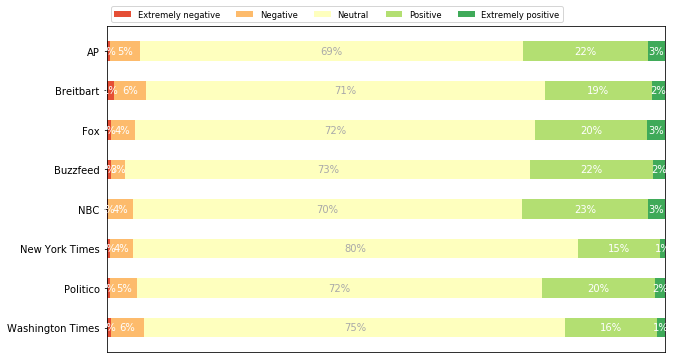

In [5]:
category_names = ['Extremely negative', 'Negative','Neutral', 'Positive', 'Extremely positive']
publishers = {
    'AP': [AP_1, AP_2, AP_3, AP_4, AP_5],
    'Breitbart': [Breitbart_1, Breitbart_2, Breitbart_3, Breitbart_4, Breitbart_5],
    'Fox': [Fox_1, Fox_2, Fox_3, Fox_4, Fox_5],
    'Buzzfeed': [buzzfeed_1, buzzfeed_2, buzzfeed_3, buzzfeed_4, buzzfeed_5],
    'NBC': [nbc_1, nbc_2, nbc_3, nbc_4, nbc_5],
    'New York Times': [new_york_times_1, new_york_times_2, new_york_times_3, new_york_times_4, new_york_times_5],
    'Politico': [politico_1, politico_2, politico_3, politico_4, politico_5],
    'Washington Times': [washington_times_1, washington_times_2, washington_times_3, washington_times_4, washington_times_5]
}

def survey(publishers, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(publishers.keys())
    data = np.array(list(publishers.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str("{0:.0%}".format(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(publishers, category_names)
plt.savefig('sentiment_count_sanders.png', bbox_inches='tight')

Biden

In [6]:
biden = data.loc[data['Biden'] == 1]


# AP sentiment
AP = biden.loc[biden['publisher'] == "AP"]
AP_sent = AP['sentiment'].sort_values(ascending=True)
# get sentiment counts
AP_sent_count = AP_sent.value_counts().sort_index()
# get percent per sentiment category
AP_1 = AP_sent_count[1]/len(AP_sent)
AP_2 = AP_sent_count[2]/len(AP_sent)
AP_3 = AP_sent_count[3]/len(AP_sent)
AP_4 = AP_sent_count[4]/len(AP_sent)
AP_5 = AP_sent_count[5]/len(AP_sent)

# Breitbart sentiment
Breitbart = biden.loc[biden['publisher'] == "Breitbart"]
Breitbart_sent = Breitbart['sentiment'].sort_values(ascending=True)
# get sentiment counts
Breitbart_sent_count = Breitbart_sent.value_counts().sort_index()
# get percent per sentiment category
Breitbart_1 = Breitbart_sent_count[1]/len(Breitbart_sent)
Breitbart_2 = Breitbart_sent_count[2]/len(Breitbart_sent)
Breitbart_3 = Breitbart_sent_count[3]/len(Breitbart_sent)
Breitbart_4 = Breitbart_sent_count[4]/len(Breitbart_sent)
Breitbart_5 = Breitbart_sent_count[5]/len(Breitbart_sent)

# Fox sentiment
Fox = biden.loc[biden['publisher'] == "Fox"]
Fox_sent = Fox['sentiment'].sort_values(ascending=True)
# get sentiment counts
Fox_sent_count = Fox_sent.value_counts().sort_index()
# get percent per sentiment category
Fox_1 = Fox_sent_count[1]/len(Fox_sent)
Fox_2 = Fox_sent_count[2]/len(Fox_sent)
Fox_3 = Fox_sent_count[3]/len(Fox_sent)
Fox_4 = Fox_sent_count[4]/len(Fox_sent)
Fox_5 = Fox_sent_count[5]/len(Fox_sent)

# Buzzfeed sentiment
buzzfeed = biden.loc[biden['publisher'] == "buzzfeed"]
buzzfeed_sent = buzzfeed['sentiment'].sort_values(ascending=True)
# get sentiment counts
buzzfeed_sent_count = buzzfeed_sent.value_counts().sort_index()
# get percent per sentiment category
buzzfeed_1 = buzzfeed_sent_count[1]/len(buzzfeed_sent)
buzzfeed_2 = buzzfeed_sent_count[2]/len(buzzfeed_sent)
buzzfeed_3 = buzzfeed_sent_count[3]/len(buzzfeed_sent)
buzzfeed_4 = buzzfeed_sent_count[4]/len(buzzfeed_sent)
buzzfeed_5 = buzzfeed_sent_count[5]/len(buzzfeed_sent)

# NBC
nbc = biden.loc[biden['publisher'] == "nbc"]
nbc_sent = nbc['sentiment'].sort_values(ascending=True)
# get sentiment counts
nbc_sent_count = nbc_sent.value_counts().sort_index()
# get percent per sentiment category
nbc_1 = nbc_sent_count[1]/len(nbc_sent)
nbc_2 = nbc_sent_count[2]/len(nbc_sent)
nbc_3 = nbc_sent_count[3]/len(nbc_sent)
nbc_4 = nbc_sent_count[4]/len(nbc_sent)
nbc_5 = nbc_sent_count[5]/len(nbc_sent)

# New York Times
new_york_times = biden.loc[biden['publisher'] == "new_york_times"]
new_york_times_sent = new_york_times['sentiment'].sort_values(ascending=True)
# get sentiment counts
new_york_times_sent_count = new_york_times_sent.value_counts().sort_index()
# get percent per sentiment category
new_york_times_1 = new_york_times_sent_count[1]/len(new_york_times_sent)
new_york_times_2 = new_york_times_sent_count[2]/len(new_york_times_sent)
new_york_times_3 = new_york_times_sent_count[3]/len(new_york_times_sent)
new_york_times_4 = new_york_times_sent_count[4]/len(new_york_times_sent)
new_york_times_5 = new_york_times_sent_count[5]/len(new_york_times_sent)

# Politico
politico = biden.loc[biden['publisher'] == "politico"]
politico_sent = politico['sentiment'].sort_values(ascending=True)
# get sentiment counts
politico_sent_count = politico_sent.value_counts().sort_index()
# get percent per sentiment category
politico_1 = politico_sent_count[1]/len(politico_sent)
politico_2 = politico_sent_count[2]/len(politico_sent)
politico_3 = politico_sent_count[3]/len(politico_sent)
politico_4 = politico_sent_count[4]/len(politico_sent)
politico_5 = politico_sent_count[5]/len(politico_sent)

# Washington Times
washington_times = biden.loc[biden['publisher'] == "washington_times"]
washington_times_sent = washington_times['sentiment'].sort_values(ascending=True)
# get sentiment counts
washington_times_sent_count = washington_times_sent.value_counts().sort_index()
# get percent per sentiment category
washington_times_1 = washington_times_sent_count[1]/len(washington_times_sent)
washington_times_2 = washington_times_sent_count[2]/len(washington_times_sent)
washington_times_3 = washington_times_sent_count[3]/len(washington_times_sent)
washington_times_4 = washington_times_sent_count[4]/len(washington_times_sent)
washington_times_5 = washington_times_sent_count[5]/len(washington_times_sent)

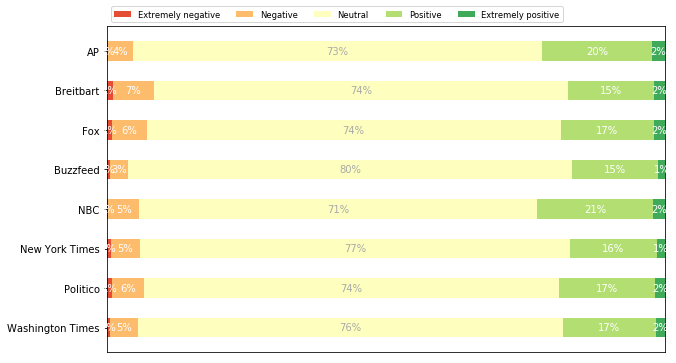

In [7]:
category_names = ['Extremely negative', 'Negative','Neutral', 'Positive', 'Extremely positive']
publishers = {
    'AP': [AP_1, AP_2, AP_3, AP_4, AP_5],
    'Breitbart': [Breitbart_1, Breitbart_2, Breitbart_3, Breitbart_4, Breitbart_5],
    'Fox': [Fox_1, Fox_2, Fox_3, Fox_4, Fox_5],
    'Buzzfeed': [buzzfeed_1, buzzfeed_2, buzzfeed_3, buzzfeed_4, buzzfeed_5],
    'NBC': [nbc_1, nbc_2, nbc_3, nbc_4, nbc_5],
    'New York Times': [new_york_times_1, new_york_times_2, new_york_times_3, new_york_times_4, new_york_times_5],
    'Politico': [politico_1, politico_2, politico_3, politico_4, politico_5],
    'Washington Times': [washington_times_1, washington_times_2, washington_times_3, washington_times_4, washington_times_5]
}

def survey(publishers, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(publishers.keys())
    data = np.array(list(publishers.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str("{0:.0%}".format(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(publishers, category_names)
plt.savefig('sentiment_count_biden.png', bbox_inches='tight')

Time

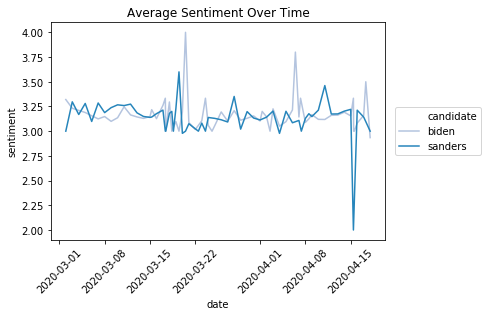

In [10]:
warnings.simplefilter(action='ignore')

# filter sentences only about one candidate

#sanders
sanders = data.loc[data['Sanders'] == 1]
biden = data.loc[data['Biden'] == 1]      
combined = pd.concat([sanders, biden], axis=0)
        
#candidate_sentiment = data.loc[data['candidates_mentioned'] == 1]
candidate_sentiment = combined

candidates = ['Sanders', 'Biden']
# create new column with candidate name
candidate_sentiment['candidate'] = candidate_sentiment['article_text'].str.extract('({})'.format('|'.join(candidates)),
                                            flags = re.IGNORECASE, expand = False).str.lower().fillna('')
candidate_sentiment['candidate'] = np.where(candidate_sentiment['article_text'].str.contains('bernie'), 'sanders', candidate_sentiment['candidate'])
candidate_sentiment = candidate_sentiment[['date', 'sentiment', 'candidate']]
candidate_sentiment = candidate_sentiment[candidate_sentiment.candidate != '']

# make dates consistent and filter for time frame
candidate_sentiment['date'] = pd.to_datetime(candidate_sentiment['date'], errors='coerce')
mask = (candidate_sentiment['date'].astype('str') >= "2020-03-01") & (candidate_sentiment['date'].astype('str') < "2020-04-19")
candidate_sentiment = candidate_sentiment.loc[mask]

# mean sentiment per day
mean_per_day = candidate_sentiment.groupby(['date', 'candidate']).mean()
mean_per_day.reset_index(inplace = True)
                 
self_sentiment_time = mean_per_day
      
chart = sns.lineplot(x = 'date', y = 'sentiment', hue = 'candidate', palette="PuBu", data = self_sentiment_time)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.setp(chart.get_xticklabels(), rotation = 45)
plt.title('Average Sentiment Over Time')
plt.title('Average Sentiment Over Time')
chart.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.savefig('sentiment_time.png', bbox_inches='tight')

Averages

In [9]:
print("Sanders mean", sanders['sentiment'].mean())
print("Biden mean", biden['sentiment'].mean())
print("Both mean", combined['sentiment'].mean())

Sanders mean 3.19171756606427
Biden mean 3.1494917100326756
Both mean 3.1671780354646715


# Preparing final version in OOP

In [127]:
class SentimentAnalysis:
    """
    A class to runs a TextBlob sentiment analysis and create descriptive plots.
    """
    def __init__(self):
        self._sentence_data = None
        self.clean_data = None
        self._sentiment_analysis = None
        self.candidate_sentiment = None
        self.sanders_sentiment_plot = None
        self.biden_sentiment_plot = None
        self.sentiment_time = None
        self.sentiment_time_plot = None
    
    def sentence_data(self):
        """
        Reads in sentence data from scraper and removes punctuation, numbers, stopwords and lowercases from sentence data and adds to new column in data.
        return: pd.DataFrame
        """
        self.sentence_data = pd.read_csv('data/sentence_data.csv')
        
        # setup
        sentences = self.sentence_data['article_text']

        # lowercase everything
        sentences = [sentences.lower() for sentences in sentences]

        # remove punctuation
        sentences = [s.replace("’s",'') for s in sentences] # remove apostrophe s first
        sentences = [re.sub(r'[^\w\s]','',s) for s in sentences]

        # remove numbers
        sentences = [re.sub('[0-9]','', s) for s in sentences]

        # remove double space
        sentences = [s.replace("  ",' ') for s in sentences]

        # remove stopwords
        clean = []
        for item in sentences:
            for word in stopwords.words('english'):
                item = item.replace(" " + word + " ", ' ')
            clean.append(item)

        self.sentence_data['article_text_clean'] = clean
        
        return self.sentence_data
    
    def sentiment_analysis(self):
        """
        Uses TextBlob's rule-based API to conduct sentiment analysis. Adds score to new column in data.
        return: pd.DataFrame
        """
        # setup
        data = self.sentence_data
        text = self.sentence_data['article_text_clean']
        score = []
        
        for sentence in text:
            sentence = TextBlob(sentence)
            x = sentence.sentiment
            x = sentence.sentiment.polarity
            score.append(x)

        data['score'] = score

        # Convert float score to category based on binning to get 5 levels
        data['sentiment'] = pd.cut(data['score'],
                            bins=5,
                            labels=[1, 2, 3, 4, 5])
        data['sentiment'] = pd.to_numeric(data['sentiment'])
        data = data.drop('score', axis=1)
        
        self.sentiment_analysis = data
        
        return self.sentiment_analysis

    def candidate_sentiment_means(self):
        """
        Calculates the sentiment averages accross all candidates, per candidate and per candidate and outlet.
        return: dataframe of candidate sentiment mean
        """
        data = self.sentiment_analysis
        
        #sanders
        sanders = data.loc[data['Sanders'] == 1]
        sanders_sent_mean = sanders['sentiment'].mean()
        sanders_sentiment = sanders.groupby('publisher')['sentiment'].mean().reset_index()

        #biden
        biden = data.loc[data['Biden'] == 1]
        biden_sent_mean = biden['sentiment'].mean()
        biden_sentiment = biden.groupby('publisher')['sentiment'].mean().reset_index()
        
        # total average
        combined = pd.concat([sanders, biden], axis=0)
        sent_mean = data['sentiment'].mean()
        
        self.candidate_sentiment_means = pd.DataFrame(data={'sent_mean': [sent_mean],
                                                            'sanders_sent_mean': [sanders_sent_mean],
                                                            'biden_sent_mean': [biden_sent_mean]})

        return self.candidate_sentiment_means

    def candidate_sentiment_plot(self):
        """
        Plots difference in each candidate's sentiment average to overall sentiment mean.
        return: bar plot
        """
        sentiment = [self.candidate_sentiment_means.at[0, 'sanders_sent_mean']-self.candidate_sentiment_means.at[0, 'sent_mean'], 
                     self.candidate_sentiment_means.at[0, 'biden_sent_mean']-self.candidate_sentiment_means.at[0, 'sent_mean']]
        candidates = ['Sanders', 'Biden']
        
        plt.bar(candidates, sentiment, color=["lightsteelblue", "tomato"])
        plt.xticks(candidates)
        plt.xticks()
        plt.text(x=-0.8, y=-0, s="Average Sentiment:" + str(self.candidate_sentiment_means.at[0,'sent_mean']), horizontalalignment='left')
        plt.savefig('candidate_sentiment.png', bbox_inches='tight')
        
    def sanders_sentiment_plot(self):
        """
        Plots difference in Sander's sentiment average per publisher to his overall sentiment mean.
        return: bar plot
        """
        data = self.sentiment_analysis
        sanders = data.loc[data['Sanders'] == 1]
        sanders_sentiment = sanders.groupby('publisher')['sentiment'].mean().reset_index()
        
        sentiment = sanders_sentiment['sentiment'] - self.candidate_sentiment_means.at[0,'sanders_sent_mean']
        outlet = sanders_sentiment['publisher']

        plt.bar(outlet, sentiment, color = "tomato") 
        plt.xticks(outlet)
        plt.xticks(rotation=45)
        plt.suptitle('Sanders: Sentiment by Publisher', fontsize=16)
        plt.text(x=-0.8, y=-.16, s="Sanders's sentiment mean:" + str(self.candidate_sentiment_means.at[0, 'sanders_sent_mean']), horizontalalignment='left')
        plt.text(x=-0.8, y=-.17, s="Number of Sanders sentences:" + str(len(sanders)), horizontalalignment='left')
        plt.savefig('sanders.png', bbox_inches='tight')

    def biden_sentiment_plot(self):
        """
        Plots difference in Biden's sentiment average per publisher to his overall sentiment mean.
        return: bar plot
        """
        data = self.sentiment_analysis
        biden = data.loc[data['Biden'] == 1]
        biden_sentiment = biden.groupby('publisher')['sentiment'].mean().reset_index()
        sentiment = biden_sentiment['sentiment'] - self.candidate_sentiment_means.at[0,'biden_sent_mean']
        outlet = biden_sentiment['publisher']

        plt.bar(outlet, sentiment, color = "coral") 
        plt.xticks(outlet)
        plt.xticks(rotation=45)
        plt.suptitle('Biden: Sentiment by Publisher', fontsize=16)
        plt.text(x=-0.8, y=-.13, s="Biden's sentiment mean:" + str(self.candidate_sentiment_means.at[0, 'biden_sent_mean']), horizontalalignment='left')
        plt.text(x=-0.8, y=-.14, s="Number of Biden sentences:" + str(len(biden)), horizontalalignment='left')
        plt.savefig('biden.png', bbox_inches='tight')

    def sentiment_time(self):
        """
        Calculates the mean sentiment score per candidate per day.
        return: DataFrame
        """
        data = self.sentiment_analysis
        warnings.simplefilter(action='ignore')
        # filter sentences only about one candidate
        candidate_sentiment = data.loc[data['candidates_mentioned'] == 1]

        # create new column with candidate name
        candidate_sentiment['candidate'] = candidate_sentiment['article_text'].str.extract('({})'.format('|'.join(candidates)),
                                            flags = re.IGNORECASE, expand = False).str.lower().fillna('')
        candidate_sentiment['candidate'] = np.where(candidate_sentiment['article_text'].str.contains('bernie'), 'sanders', candidate_sentiment['candidate'])
        candidate_sentiment = candidate_sentiment[['date', 'sentiment', 'candidate']]

        # make dates consistent and filter for time frame
        candidate_sentiment['date'] = pd.to_datetime(candidate_sentiment['date'], errors='coerce')
        mask = (candidate_sentiment['date'].astype('str') >= "2020-03-01") & (candidate_sentiment['date'].astype('str') < "2020-03-30")
        candidate_sentiment = candidate_sentiment.loc[mask]

        # mean sentiment per day
        mean_per_day = candidate_sentiment.groupby(['date', 'candidate']).mean()
        mean_per_day.reset_index(inplace = True)
                 
        self.sentiment_time = mean_per_day

        return self.sentiment_time

    def sentiment_time_plot(self):
        """
        Plots sentiment scores per candidate over time
        return: bar plot
        """
        chart = sns.lineplot(x = 'date', y = 'sentiment', hue = 'candidate', data = self.sentiment_time)
        plt.setp(chart.get_xticklabels(), rotation = 45)
        plt.setp(chart.get_xticklabels(), rotation = 45)
        plt.title('Average Sentiment Over Time')
        plt.title('Average Sentiment Over Time')
        chart.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
        plt.savefig('sentiment_time.png', bbox_inches='tight')

In [128]:
# working OOP
sa = SentimentAnalysis()
sa.sentence_data()
sa.sentiment_analysis()
sa.candidate_sentiment_means()
sa.candidate_sentiment_plot()

In [ ]:
# not working OOP
sa.sanders_sentiment_plot()

In [136]:
# troubleshooting

self_sentence_data = pd.read_csv('data/sentence_data.csv')
        
# setup
sentences = self_sentence_data['article_text']

# lowercase everything
sentences = [sentences.lower() for sentences in sentences]

# remove punctuation
sentences = [s.replace("’s",'') for s in sentences] # remove apostrophe s first
sentences = [re.sub(r'[^\w\s]','',s) for s in sentences]

# remove numbers
sentences = [re.sub('[0-9]','', s) for s in sentences]

# remove double space
sentences = [s.replace("  ",' ') for s in sentences]

# remove stopwords
clean = []
for item in sentences:
    for word in stopwords.words('english'):
        item = item.replace(" " + word + " ", ' ')
    clean.append(item)

self_sentence_data['article_text_clean'] = clean

# SENTIMENT ANALYSIS
# setup
data = self_sentence_data
text = self_sentence_data['article_text_clean']
score = []
        
for sentence in text:
    sentence = TextBlob(sentence)
    x = sentence.sentiment
    x = sentence.sentiment.polarity
    score.append(x)

data['score'] = score

# Convert float score to category based on binning to get 5 levels
data['sentiment'] = pd.cut(data['score'],
                    bins=5,
                    labels=[1, 2, 3, 4, 5])
data['sentiment'] = pd.to_numeric(data['sentiment'])
data = data.drop('score', axis=1)
        
self_sentiment_analysis = data

# GET MEANS
data = self_sentiment_analysis
        
#sanders
sanders = data.loc[data['Sanders'] == 1]
sanders_sent_mean = sanders['sentiment'].mean()
sanders_sentiment = sanders.groupby('publisher')['sentiment'].mean().reset_index()

#biden
biden = data.loc[data['Biden'] == 1]
biden_sent_mean = biden['sentiment'].mean()
biden_sentiment = biden.groupby('publisher')['sentiment'].mean().reset_index()
        
# total average
combined = pd.concat([sanders, biden], axis=0)
sent_mean = data['sentiment'].mean()
        
self_candidate_sentiment_means = pd.DataFrame(data={'sent_mean': [sent_mean],
                                                    'sanders_sent_mean': [sanders_sent_mean],
                                                    'biden_sent_mean': [biden_sent_mean]})

In [149]:
print(biden['sentiment'].value_counts()/len(biden['sentiment']))
print(sanders['sentiment'].value_counts()/len(sanders['sentiment']))

3    0.742047
4    0.179653
2    0.052809
5    0.019376
1    0.006116
Name: sentiment, dtype: float64
3    0.722856
4    0.202484
2    0.044461
5    0.024641
1    0.005558
Name: sentiment, dtype: float64


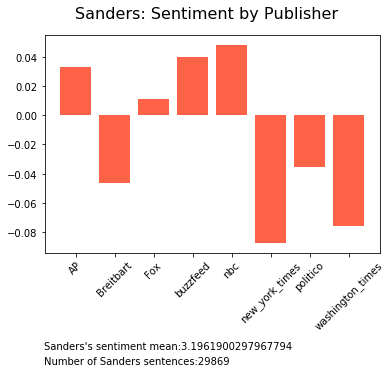

In [137]:
#### bernie sentiment graph
data = self_sentiment_analysis
sanders = data.loc[data['Sanders'] == 1]
sanders_sentiment = sanders.groupby('publisher')['sentiment'].mean().reset_index()
        
sentiment = sanders_sentiment['sentiment'] - self_candidate_sentiment_means.at[0,'sanders_sent_mean']
outlet = sanders_sentiment['publisher']

plt.bar(outlet, sentiment, color = "tomato") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Sanders: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.16, s="Sanders's sentiment mean:" + str(self_candidate_sentiment_means.at[0, 'sanders_sent_mean']), horizontalalignment='left')
plt.text(x=-0.8, y=-.17, s="Number of Sanders sentences:" + str(len(sanders)), horizontalalignment='left')
plt.savefig('sanders.png', bbox_inches='tight')

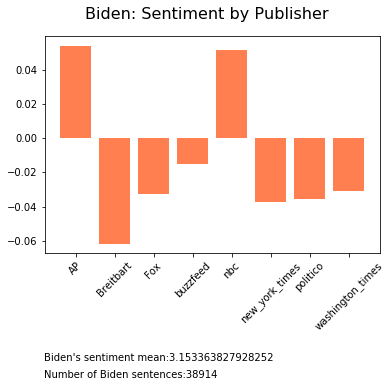

In [138]:
data = self_sentiment_analysis
biden = data.loc[data['Biden'] == 1]
biden_sentiment = biden.groupby('publisher')['sentiment'].mean().reset_index()
sentiment = biden_sentiment['sentiment'] - self_candidate_sentiment_means.at[0,'biden_sent_mean']
outlet = biden_sentiment['publisher']

plt.bar(outlet, sentiment, color = "coral") 
plt.xticks(outlet)
plt.xticks(rotation=45)
plt.suptitle('Biden: Sentiment by Publisher', fontsize=16)
plt.text(x=-0.8, y=-.13, s="Biden's sentiment mean:" + str(self_candidate_sentiment_means.at[0, 'biden_sent_mean']), horizontalalignment='left')
plt.text(x=-0.8, y=-.14, s="Number of Biden sentences:" + str(len(biden)), horizontalalignment='left')
plt.savefig('biden.png', bbox_inches='tight')

In [139]:
sentiment = [self_candidate_sentiment_means.at[0, 'sanders_sent_mean']-self_candidate_sentiment_means.at[0, 'sent_mean'], 
                     self_candidate_sentiment_means.at[0, 'biden_sent_mean']-self_candidate_sentiment_means.at[0, 'sent_mean']]
candidates = ['Sanders', 'Biden']
        
plt.bar(candidates, sentiment, color=["lightsteelblue", "tomato"])
plt.xticks(candidates)
plt.xticks()
plt.text(x=-0.8, y=-0, s="Average Sentiment:" + str(self.candidate_sentiment_means.at[0,'sent_mean']), horizontalalignment='left')
plt.savefig('candidate_sentiment.png', bbox_inches='tight')

NameError: name 'self' is not defined

In [ ]:
sa.biden_sentiment_plot()

In [26]:
sa.sentiment_time()

sa.sentiment_time_plot()

TypeError: 'NoneType' object is not subscriptable